In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Placeholder for dataset loading (to be replaced with actual dataset path or URL)
# For now, we create a mock dataset for demonstration purposes.
# Replace with actual data loading code.
def load_mock_data():
    np.random.seed(42)
    data_size = 500
    data = pd.DataFrame({
        'LotArea': np.random.randint(1000, 10000, data_size),
        'OverallQual': np.random.randint(1, 10, data_size),
        'YearBuilt': np.random.randint(1900, 2020, data_size),
        'FullBath': np.random.randint(0, 4, data_size),
        'GarageCars': np.random.randint(0, 4, data_size),
        'SalePrice': np.random.randint(50000, 500000, data_size)
    })
    return data

In [3]:
# Load data
data = load_mock_data()

In [4]:
print(data.head())

   LotArea  OverallQual  YearBuilt  FullBath  GarageCars  SalePrice
0     8270            9       1991         2           2     174982
1     1860            1       2012         0           1     306911
2     6390            6       2013         3           0     118619
3     6191            7       1993         1           2     210400
4     6734            8       1937         1           0     358623


In [5]:
# Splitting features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [6]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Preprocessing pipelines for numeric features
numeric_features = ['LotArea', 'YearBuilt', 'OverallQual', 'FullBath', 'GarageCars']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [8]:
# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [9]:
# Linear Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [10]:
# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [11]:
# Fitting and evaluating Linear Regression model
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Fitting and evaluating Random Forest model
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)



In [12]:
# Results visualization
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [lr_mse, rf_mse],
    'R2 Score': [lr_r2, rf_r2]
})

# Feature importance for Random Forest
rf_model = rf_pipeline.named_steps['regressor']
rf_importances = rf_model.feature_importances_

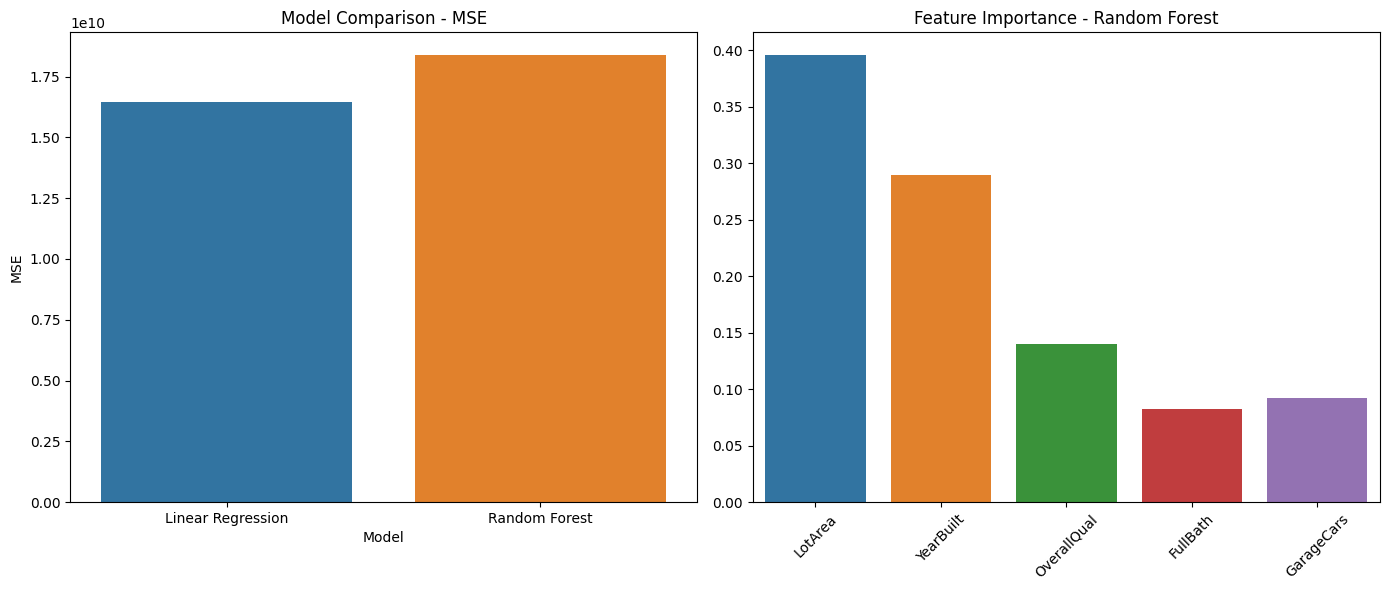

In [13]:
# Visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=results['Model'], y=results['MSE'])
plt.title("Model Comparison - MSE")

plt.subplot(1, 2, 2)
sns.barplot(x=numeric_features, y=rf_importances)
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
results

,Model,MSE,R2 Score
0,Linear Regression,1.644522e+10,-0.011213
1,Random Forest,1.839785e+10,-0.131280
